# ARMAX MIMO Example

Example ARMAX MIMO case with 3 outputs and 4 inputs.

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline

from sippy_unipi.datasets import load_sample_mimo
from sippy_unipi.io import ARMAX
from sippy_unipi.plot import plot_comparison
from sippy_unipi.preprocessing import StandardScaler

seed = 0
np.random.seed(seed)

%load_ext autoreload
%autoreload 2

In [2]:
n_samples = 401
ts = 1
time, Ysim, Usim, g_sys, Yerr, Uerr, h_sys, Ytot, Utot = load_sample_mimo(
    n_samples, ts, seed=seed
)

### Identification Parameters

In [3]:
na = [3, 1, 2]
nb = [[2, 1, 3, 2], [3, 2, 1, 1], [1, 2, 1, 2]]
nc = [2, 2, 3]
th = [[1, 2, 2, 1], [1, 2, 0, 0], [0, 1, 0, 2]]

models = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("model", ARMAX(na, nb, nc, th, ts, method="ills")),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("model", ARMAX(na, nb, nc, th, ts, method="opt")),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("model", ARMAX(na, nb, nc, th, ts, method="rlls")),
        ]
    ),
]

In [4]:
Ys_pred = []
for model in models:
    model.fit(Utot, Ytot)
    Ys_pred.append(model.predict(Utot))

/Users/mw/pyprojects/SIPPY/sippy_unipi/utils/validation.py:242: UserWarning: One of the identified system is not stable
  warn("One of the identified system is not stable")
/Users/mw/pyprojects/SIPPY/sippy_unipi/utils/validation.py:249: UserWarning: Consider activating the stability constraint. The maximum pole is 1.0007882332157845  
  warn(


### Plot Identification Results

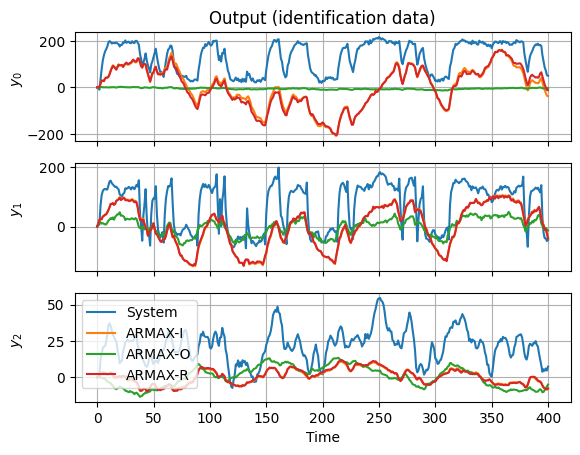

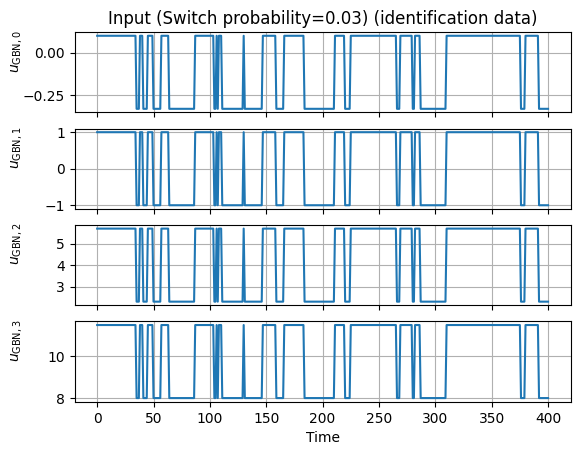

In [5]:
fig = plot_comparison(
    time,
    [Ytot] + Ys_pred,
    ylabels=[f"$y_{i}$" for i in range(3)],
    legend=["System", "ARMAX-I", "ARMAX-O", "ARMAX-R"],
    title="Output (identification data)",
)

fig = plot_comparison(
    time,
    Usim,
    [r"$u_\mathrm{GBN, " + str(i) + "}$" for i in range(Usim.shape[1])],
    title="Input (Switch probability=0.03) (identification data)",
)

### Validation Stage

In [6]:
time, Ysimval, Usimval, g_sys, Yerrval, Uerrval, h_sys, Yval, Uval = (
    load_sample_mimo(
        n_samples,
        ts,
        input_ranges=[(0.33, 0.7), (-2.0, -1.0), (1.3, 2.7), (1.0, 5.2)],
        seed=seed,
    )
)

Ysv_pred = []
for model_fitted in models:
    Ysv_pred.append(model_fitted.predict(Uval))

### Plot Validation Results

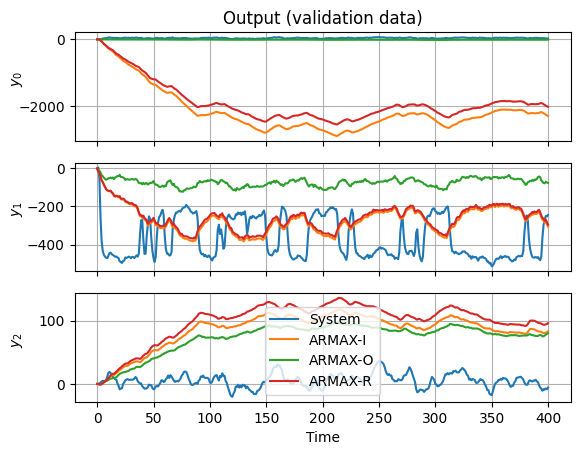

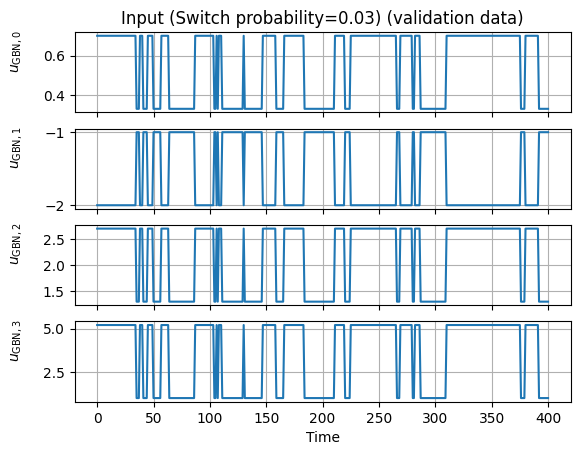

In [7]:
fig = plot_comparison(
    time,
    [Yval] + Ysv_pred,
    ylabels=[f"$y_{i}$" for i in range(Yval.shape[1])],
    legend=["System", "ARMAX-I", "ARMAX-O", "ARMAX-R"],
    title="Output (validation data)",
)

fig = plot_comparison(
    time,
    Usimval,
    [r"$u_\mathrm{GBN, " + str(i) + "}$" for i in range(Usimval.shape[1])],
    title="Input (Switch probability=0.03) (validation data)",
)